# i) Delivery Time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
dataset1 = pd.read_csv('delivery_time.csv')

In [6]:
dataset1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and DV

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

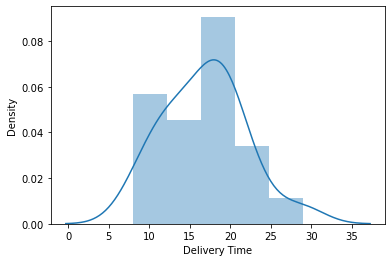

In [9]:
sns.distplot(dataset1['Delivery Time'])

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

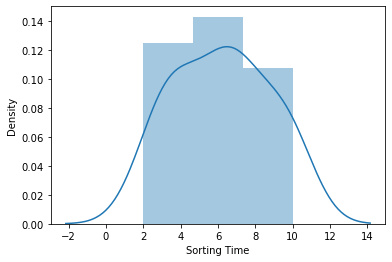

In [10]:
sns.distplot(dataset1['Sorting Time'])

In [23]:
# Renaming Columns
dataset1=dataset1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis 

In [12]:
dataset1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

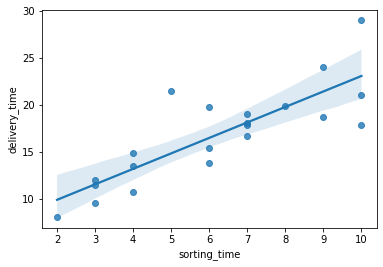

In [27]:
sns.regplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])

# Model Building

In [29]:
model=smf.ols("delivery_time~sorting_time",data=dataset1).fit()

# Model Testing

In [30]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [31]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [32]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [33]:
 # Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [37]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([9,5,8,7,6,8])
new_data

0    9
1    5
2    8
3    7
4    6
5    8
dtype: int64

In [38]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,9
1,5
2,8
3,7
4,6
5,8


In [39]:
model.predict(data_pred)

0    21.423913
1    14.827833
2    19.774893
3    18.125873
4    16.476853
5    19.774893
dtype: float64

# ii) Salary Data

In [42]:
dataset2 = pd.read_csv('Salary_Data.csv')

In [43]:
dataset2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and DV

In [44]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

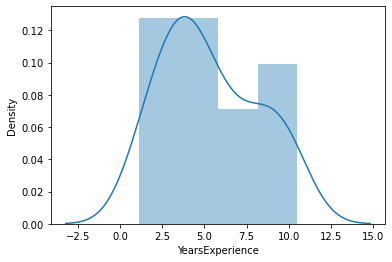

In [45]:
sns.distplot(dataset2['YearsExperience'])

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

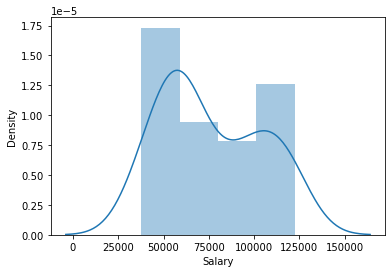

In [46]:
sns.distplot(dataset2['Salary'])

# FEATURE ENGINEERING

In [47]:
# Renaming Columns
dataset2=dataset1.rename({'YearsExperience':'years_experience', 'Salary':'salary'},axis=1)
dataset2

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Correlation Analysis 

In [48]:
dataset2.corr()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='salary', ylabel='years_experience'>

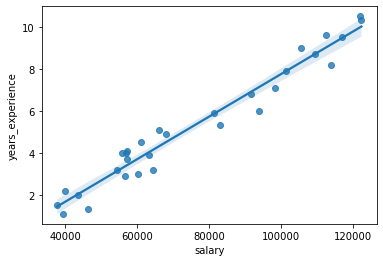

In [52]:
sns.regplot(x=dataset2['salary'],y=dataset2['years_experience'])

# Model Building

In [61]:
model=smf.ols("salary~years_experience",data=dataset2).fit()

# Model Testing


In [62]:
# Finding Coefficient parameters
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [63]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept           11.346940
 years_experience    24.950094
 dtype: float64,
 Intercept           5.511950e-12
 years_experience    1.143068e-20
 dtype: float64)

In [64]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [65]:
 # Manual prediction for say years_experience 8
salary = (25792.200199) + (9449.962321)*(8)
salary

101391.898767

In [66]:
new_data=pd.Series([10,15,1,20,25,9])
new_data

0    10
1    15
2     1
3    20
4    25
5     9
dtype: int64

In [68]:
data_pred=pd.DataFrame(new_data,columns=['years_experience'])
data_pred

,years_experience
0,10
1,15
2,1
3,20
4,25
5,9


In [69]:
model.predict(data_pred)

0    120291.823413
1    167541.635020
2     35242.162520
3    214791.446628
4    262041.258235
5    110841.861092
dtype: float64